# Clusterização dos Penguins

Neste projeto, vamos explorar o algoritmo de clustering K-means aplicado a um banco de dados de informações fisiológicas de cerca de 350 penguins.

A base de dados utilizada é a penguins do pacote seaborn, que contém informações sobre três espécies de pinguins: Adelie, Chinstrap e Gentoo. As variáveis disponíveis incluem medições físicas dos pinguins coletadas na Antártica.

species: Espécie do pinguim (Adelie, Chinstrap, Gentoo)

island: Ilha onde o pinguim foi observado (Biscoe, Dream, Torgersen)

bill_length_mm: Comprimento do bico em milímetros

bill_depth_mm: Profundidade do bico em milímetros

flipper_length_mm: Comprimento da barbatana em milímetros

body_mass_g: Massa corporal em gramas

sex: Sexo do pinguim (Male, Female)

year: Ano em que a observação foi feita

In [1]:
#importando as bibliotecas
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
#carregando a base de dados
penguins = sns.load_dataset('penguins')

In [3]:
#visualização da base de dados
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# 1 - Nessa etapa, vamos realizar o pré-processamento dos dados
-eliminação das variáveis categóricas

-mudança de nome das variáveis

-descarte das linhas com dados nulos

In [6]:
df = penguins.copy()

In [8]:
df = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

In [14]:
df = df.rename(columns={
    'bill_length_mm': 'comprimento_bico',
    'bill_depth_mm': 'profundidade_bico',
    'flipper_length_mm': 'comprimento_nadadeira',
    'body_mass_g': 'massa_corporal'
})

In [20]:
df = df.dropna()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   comprimento_bico       342 non-null    float64
 1   profundidade_bico      342 non-null    float64
 2   comprimento_nadadeira  342 non-null    float64
 3   massa_corporal         342 non-null    float64
dtypes: float64(4)
memory usage: 13.4 KB


# 2 - Visualização dos dados utilizando a função pairplot da biblioteca seaborn

Note que que en alguns gráficos ja podemos perceber o agrupamento de três grupos diferentes, como na primeira linha e terceira coluna (comprimento do bixo x comprimento da nadadeira).

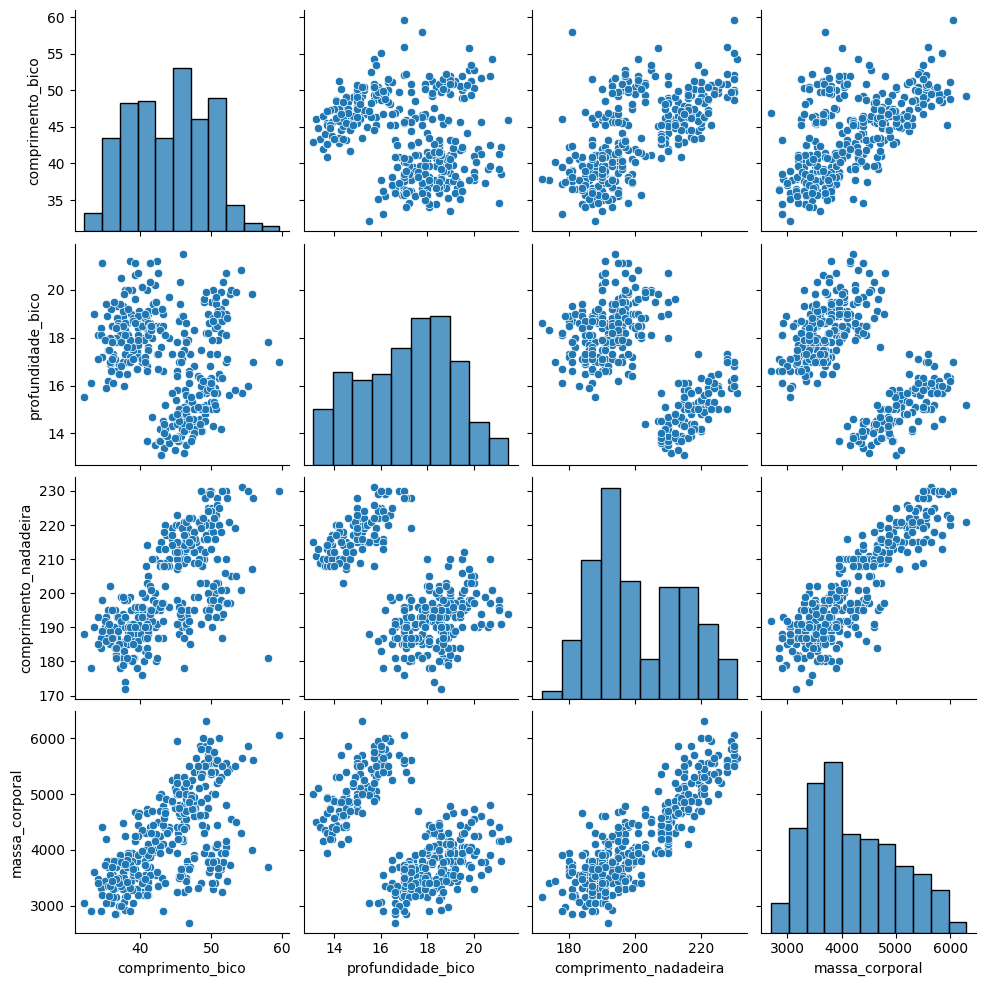

In [22]:
sns.pairplot(df)

# 3 - Padronização dos dados e visualização dos dados.

In [23]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)
print(df_scaled)

     comprimento_bico  profundidade_bico  comprimento_nadadeira  \
0           -0.884499           0.785449              -1.418347   
1           -0.811126           0.126188              -1.062250   
2           -0.664380           0.430462              -0.421277   
4           -1.324737           1.089724              -0.563715   
5           -0.847812           1.748985              -0.777373   
..                ...                ...                    ...   
338          0.601305          -1.750171               0.931890   
340          0.527932          -1.445897               1.003109   
341          1.188289          -0.735923               1.501644   
342          0.234440          -1.192335               0.789451   
343          1.096572          -0.533073               0.860670   

     massa_corporal  
0         -0.564142  
1         -0.501703  
2         -1.188532  
4         -0.938776  
5         -0.689020  
..              ...  
338        0.903175  
340        0.809516

# 4 - Aplicação do algoritmo de cluterização (KMeans) considerando o número de clusters igual a três (Três especies do banco de dados).

In [24]:
kmeans_penguins = KMeans (n_clusters=3, n_init = 10, random_state=42) #Aplicação do algoritmo nos dados padronizados
kmeans_penguins.fit(df_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [25]:
centroides = kmeans_penguins.cluster_centers_ #Revelando os cetróides padronizados
centroides

array([[ 0.66097295,  0.8169259 , -0.28620559, -0.37431308],
       [ 0.65722922, -1.09998045,  1.15886506,  1.0917612 ],
       [-1.04805941,  0.48655336, -0.89121603, -0.77061658]])

In [26]:
centroides_despadronizados = scaler.inverse_transform(centroides) #'despadronizando' os centróides
centroides_despadronizados

array([[  47.52528736,   18.76206897,  196.89655172, 3902.01149425],
       [  47.50487805,   14.98211382,  217.18699187, 5076.01626016],
       [  38.20833333,   18.11060606,  188.40151515, 3584.65909091]])

In [27]:
labels = kmeans_penguins.labels_ #classes dos penguins
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# 5 - Matriz de dispersão

Nesta etapa, faremos a visualização de duas matrizes de dispersão com seus centróides.

In [29]:
df_clusters = pd.DataFrame({
    'comprimento_bico': df['comprimento_bico'],
    'profundidade_bico': df['profundidade_bico'],
    'comprimento_nadadeira': df['comprimento_nadadeira'],
    'massa_corporal': df['massa_corporal'],
    'cluster': labels.astype(str)
})

In [35]:
fig = px.scatter(
    df_clusters,
    x='comprimento_bico',
    y='profundidade_bico',
    color='cluster',
    title='Clusterização de penguins considerando profundidade e comprimento do bico',
)

fig.add_scatter(
    x=centroides_despadronizados[:, 0],
    y=centroides_despadronizados[:, 1],
    mode='markers',
    marker=dict(color='black', symbol = 'x', size=10),
    name='Centroides',
)
fig.show()

In [39]:
fig = px.scatter(
    df_clusters,
    x='comprimento_nadadeira',
    y='comprimento_bico',
    color='cluster',
    title='Clusterização de penguins considerando comprimento de bico e nadadeira',
)

fig.add_scatter(
    x=centroides_despadronizados[:, 2],
    y=centroides_despadronizados[:, 0],
    mode='markers',
    marker=dict(color='black', symbol = 'x', size=10),
    name='Centroides',
)
fig.show()

Neste trecho do código, temo uma vizualização dos gráficos apresentados anteriormente com o pairplot. No entando, podemos percebê-los classificados com suas respectivas cores após a aplicação do algoritmo de clusterização.

<ipython-input-40-549abfae00ed>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



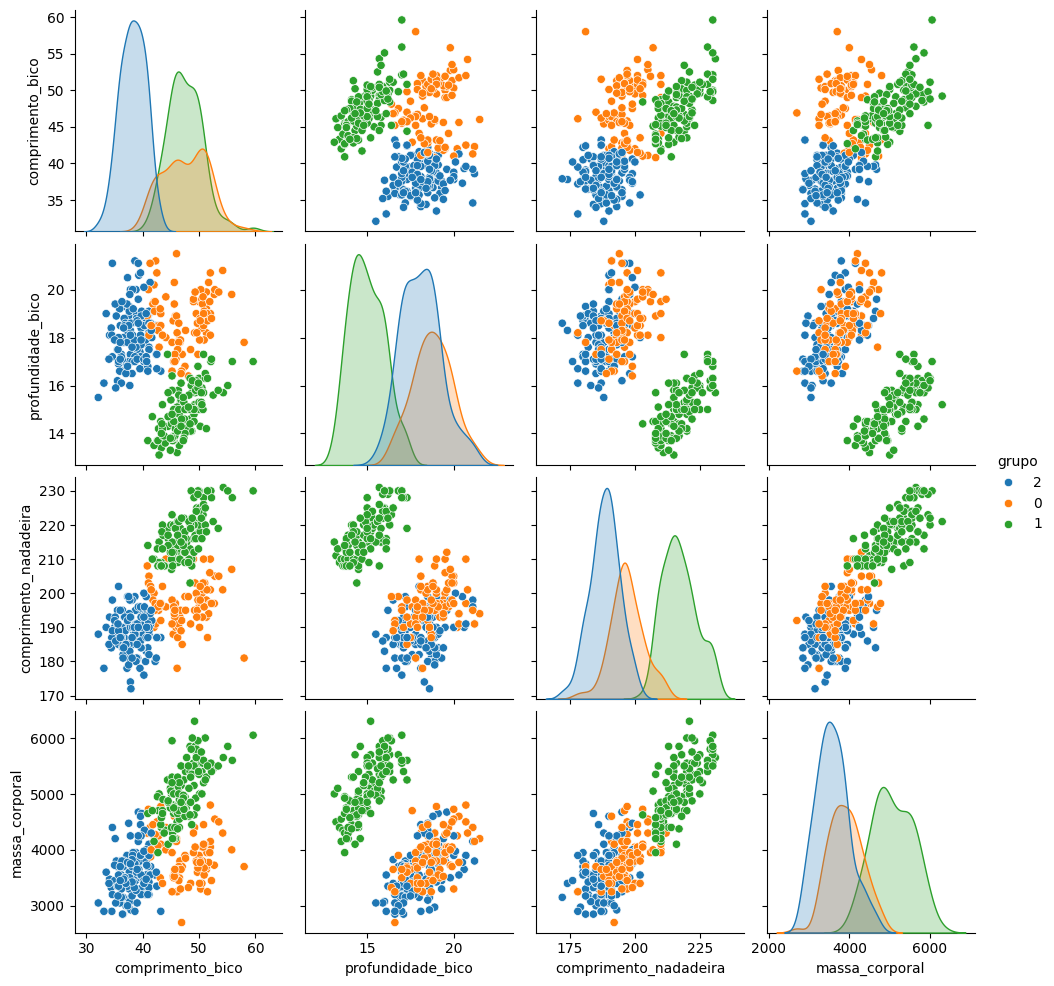

In [40]:
df['grupo'] = kmeans_penguins.labels_.astype('str')
sns.pairplot(df, hue = 'grupo')

# 6 - Algumas considerações:

Apresentamos abaixo algumas outras aplicações de como a clusterização pode ser útil em outras áreas e projetos que podem ser beneficiadas.

Segmentação de clientes: Dados de clientes como localização, preferencias, comportamentos podem permitir uma segmentação e a criação de estratégias de vendas para esses grupos específicos. Por exemplo, o envio de cupons para pessoas que comprar determinados tipos de produtos.

Detecção de anomalias em segurança cibernética: Dados de tráfego de rede, logins de usuários e outros eventos podem ser agrupados e classificados como padrões, sendo possível identificar comportamentos anormais que indiquem uma ameaça. Por exemplo, um banco pode usar essa estratégia para detectar transações fraudulentas.

Análise de imagens em exames médicos: Tomografias, radiografias e ressonâncias são exames de imagens que podem ser segmentadas e clusterizadas, sendo possivel o agrupamento de imagens que trazem comportamento suspeito e possivelmente uma doença.